In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = "C:/Users/Flora/Desktop/M2 Systèmes Complexes/Stage/Bioinfo/LTEE-clone-curated/"

In [3]:
def hist_new_insertions(IS_name):
    
    from os import listdir
    from os.path import isfile, join
    onlyfiles = [f for f in listdir(data) if isfile(join(data, f))] #listing all file names for the .gd files
    files = [] # creating a list that will first contain these names to be called, and later on open .gd files
    file_names = [] # list that will contain names as strings (kept as such for all the analysis)
    readlines_names = [] #list that will contain lists with the lines of each file (obtained via readlines())
    for i in onlyfiles: #fixing an error in the list of files (I don't know why it occurs) and filling the previously defined lists
        if len(i) < 30:
            files.append(i)
            file_names.append(i)
            readlines_names.append(i)
            
    for i in range(len(files)):
        files[i] = open(data+files[i],"r") #the list files becomes a list of open files
        readlines_names[i] = files[i].readlines() # the list readlines_names becomes a list of lists, with each list containing 
        #all the lines from one file
    
    insertion_lines = {} # Creating a dictionary to hold all the insertions found in each file
    for file_name in file_names: # Creating one entry per file in the dictionary (an empty list)
        insertion_lines[file_name] = []
    for i in range(len(file_names)): # for each file
        for line in readlines_names[i]: #we look at all the lines
            line = line.split()
            if 'MOB' and IS_name in line: #if one line corresponds to a mutation linked to a mobile element
                insertion_lines[file_names[i]].append(line[4])#we add that line to the entry of that file in the dictionary
        insertion_lines[file_name] = list(set(insertion_lines[file_name])) #getting rid of duplicates within a clone
    
    
    pop_names = ["Anc-", "Anc+", "Ara+1", "Ara+2", "Ara+3", "Ara+4", "Ara+5", "Ara+6","Ara-1", "Ara-2", "Ara-3", "Ara-4", "Ara-5", "Ara-6"]
    insertions_by_pop = {}
    for pop_name in pop_names:
        insertions_by_pop[pop_name] = []
        for file_name in list(insertion_lines.keys()):
            if pop_name in file_name:
                for insertion in insertion_lines[file_name]:
                    insertions_by_pop[pop_name].append(insertion)
        insertions_by_pop[pop_name] = list(set(insertions_by_pop[pop_name])) # getting rid of duplicates within a pop
    
    number_insertions_pop = {pop_name: len(insertions_by_pop[pop_name]) for pop_name in pop_names}
    
    %matplotlib inline
    plt.rcParams['legend.numpoints'] = 1
    plt.rcParams['figure.figsize'] = 10,7
    plt.rcParams['font.size'] = 10
    
    height = list(number_insertions_pop.values())
    bars = list(number_insertions_pop.keys())
    y_pos = np.arange(len(bars))

    plt.bar(y_pos, height, color = ['black', 'gray', 'firebrick', 'red', 'gold', 'chartreuse', 'mediumspringgreen', 'darkcyan', 'deepskyblue', 'blue', 'royalblue', 'navy', 'darkorchid', 'violet'])
    plt.xticks(y_pos, bars)
    plt.title('Number of ' + IS_name + ' insertions in each population over 50.000 generations')

    plt.show()
            

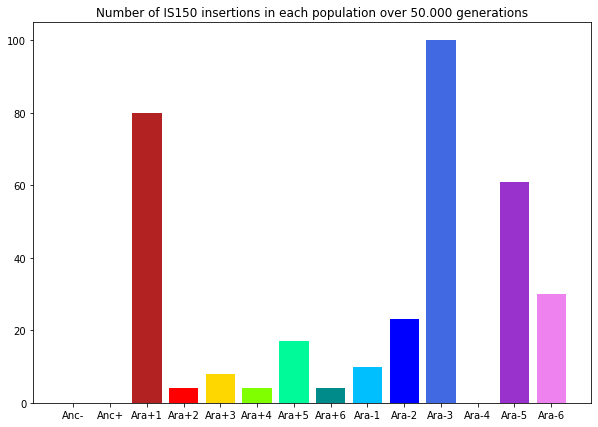

In [4]:
hist_new_insertions('IS150')

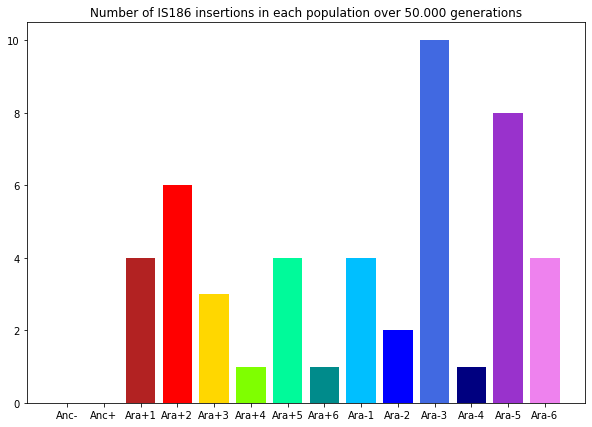

In [5]:
hist_new_insertions('IS186')

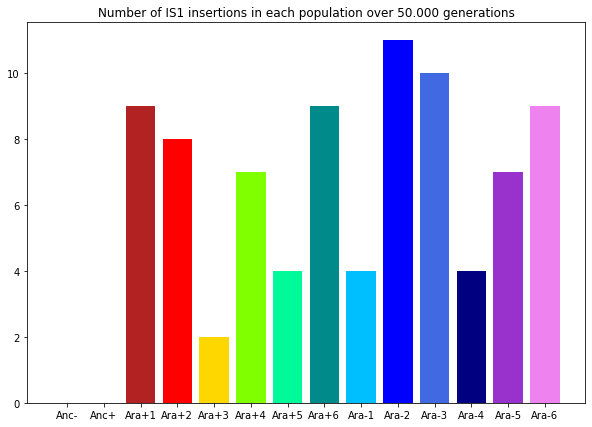

In [6]:
hist_new_insertions('IS1')

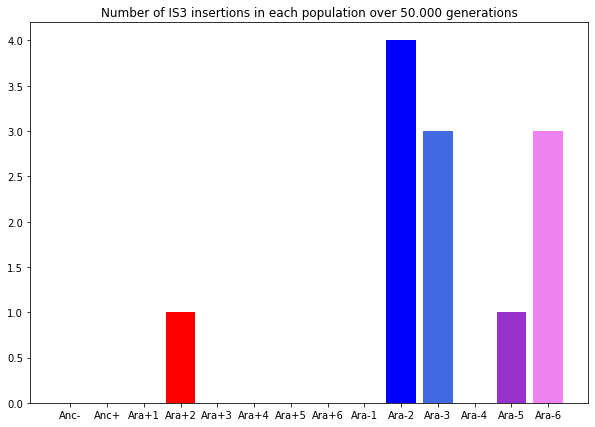

In [7]:
hist_new_insertions('IS3')

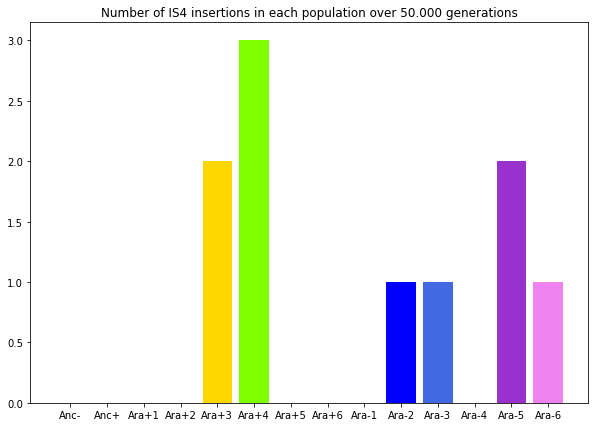

In [8]:
hist_new_insertions('IS4')